# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

In [3]:
# Acceptable to import seaborn for enhanced visualizations per live session discussion and instructor approval
import seaborn as sns

# Import necessary metrics for regression evaluation
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
# For this project, I pick the "Wine Quality" dataset from PMLB

# Load the red wine quality dataset from PMLB
redwine = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")

# Drop any rows with missing values
redwine = redwine.dropna()

# Display a random sample of 10 rows from the dataset 
redwine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1153,9.6,0.42,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,6
1450,7.2,0.37,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,7
765,9.2,0.67,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,6
725,9.0,0.66,0.17,3.0,0.077,5.0,13.0,0.99760,3.29,0.55,10.4,5
662,7.2,0.57,0.06,1.6,0.076,9.0,27.0,0.99720,3.36,0.70,9.6,6
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.1,5
410,9.0,0.43,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6
512,10.7,0.40,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6
299,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6,5
1250,7.1,0.60,0.01,2.3,0.079,24.0,37.0,0.99514,3.40,0.61,10.9,6


### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# Display the column names of the red wine quality dataset
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')

In [6]:
# Description of the columns:
print("Dataset shape:", redwine.shape)

# Basic statistics and missing values
print("\nBasic statistics:")
print(redwine.describe())

# Check for the total number of missing values
print("\nMissing values:", redwine.isnull().sum().sum())

# Count wine quality distribution 
print("\nWine quality distribution:")
print(redwine['target'].value_counts().sort_index())

Dataset shape: (1599, 12)

Basic statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min

#### Describe the dataset column names

This dataset provides **redwine testing and rating** records. It had 12 columns, which include **11 input Features** ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'), and **1 output Target** ('target').

Column "target" is renamed from the original "quality" column from the UI Irvine Machine Learning Repository

  - **Description**: Wine quality score based on sensory data, median of at least 3 evaluations made by wine experts.
  - **Value**: From 0 (very bad) to 10 (very excellent)

**Other column names and descriptions:**

  - **fixed acidity** - Non-volatile acids (tartaric, malic, citric) contributes to taste and stability

  - **volatile acidity** - Volatile acids (acetic acid) contributes to wine aroma

  - **citric acid** - attribute that adds freshness and flavor

  - **residual sugar** - attribute that affects wine sweetness

  - **chlorides** - attribute that affects wine saltiness

  - **free sulfur dioxide** - attribute that prevents microbial growth and oxidation

  - **total sulfur dioxide** - total amount of Sulfur (regulated by laws)

  - **density** - density of wine content

  - **pH** - Acidity level, measurements of wine's stability, colors and ages

  - **sulphates** - additive that increases fulfur dioxide levels

  - **alcohol** - Alcohol content by volume, contributor to wine's overall balance

*Referenced*:
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
   

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

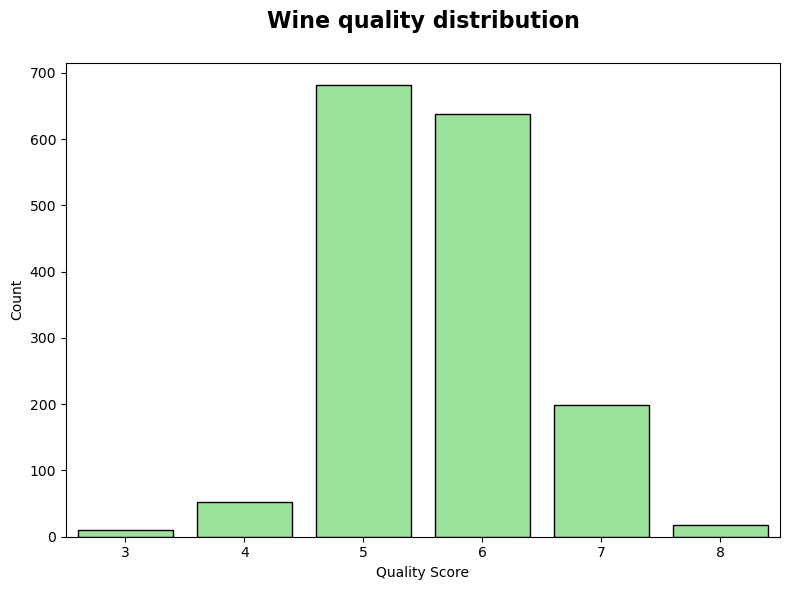

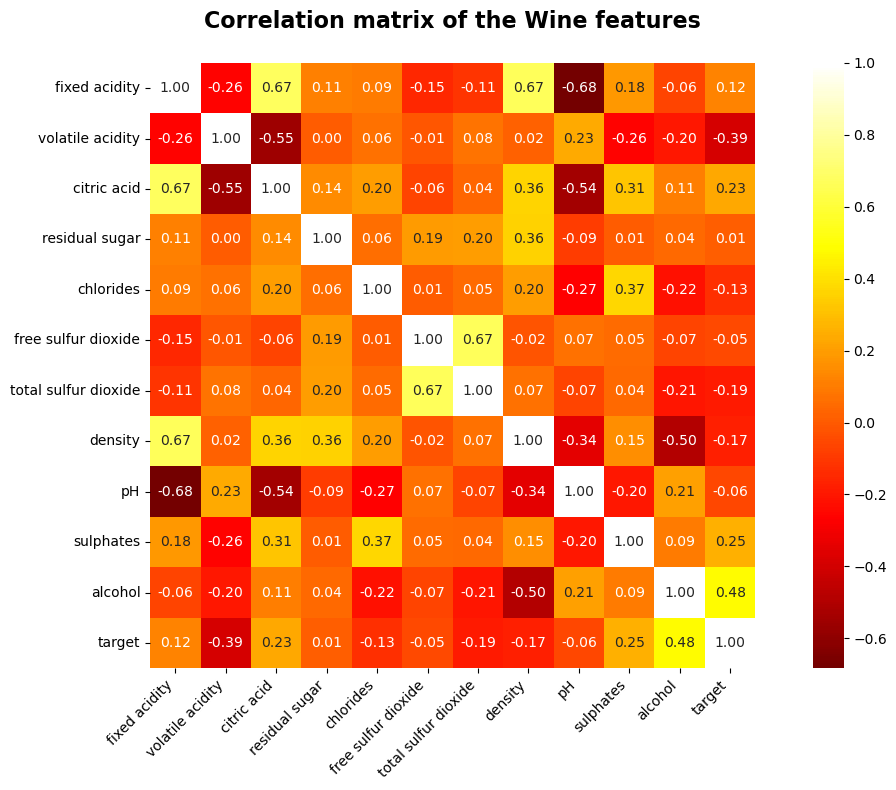

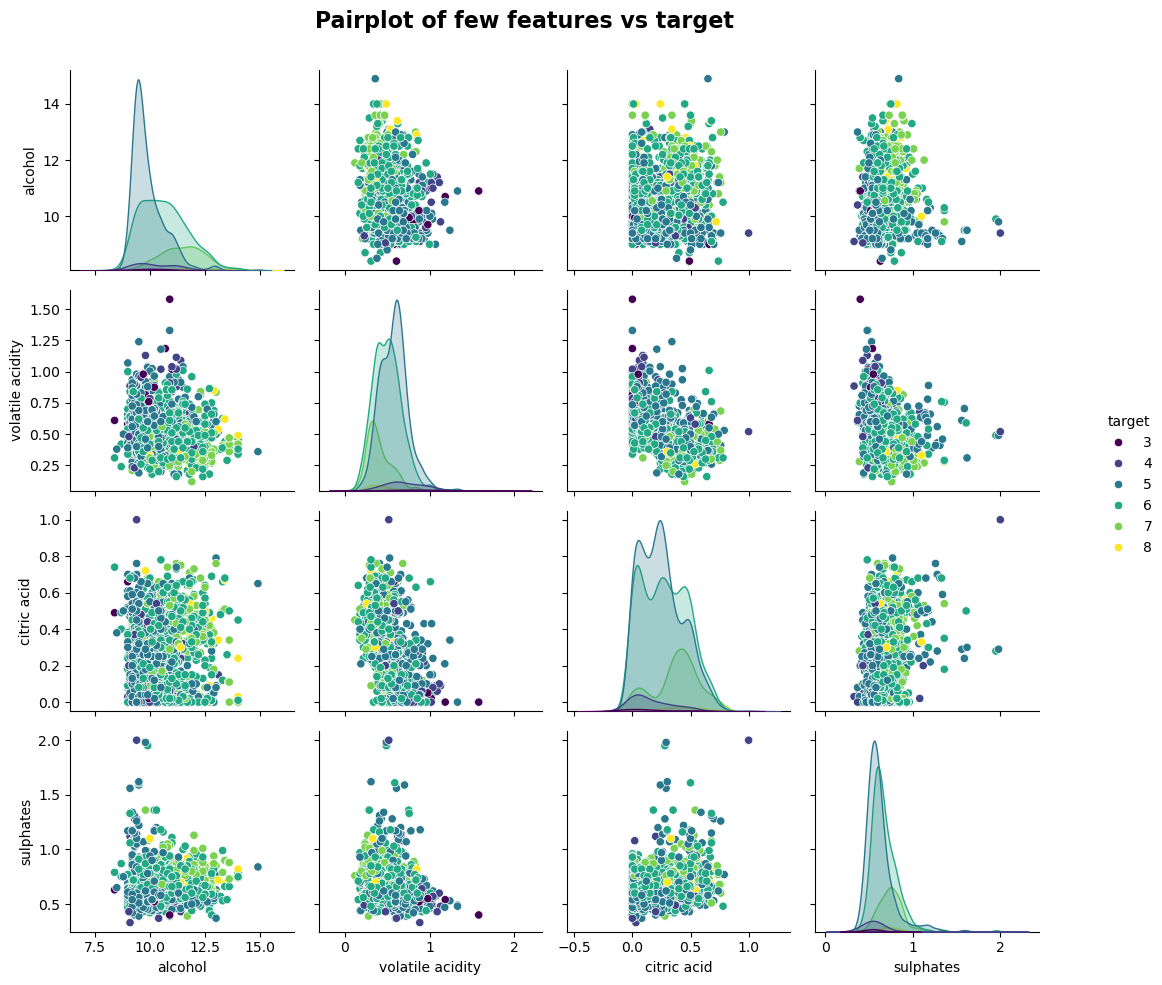

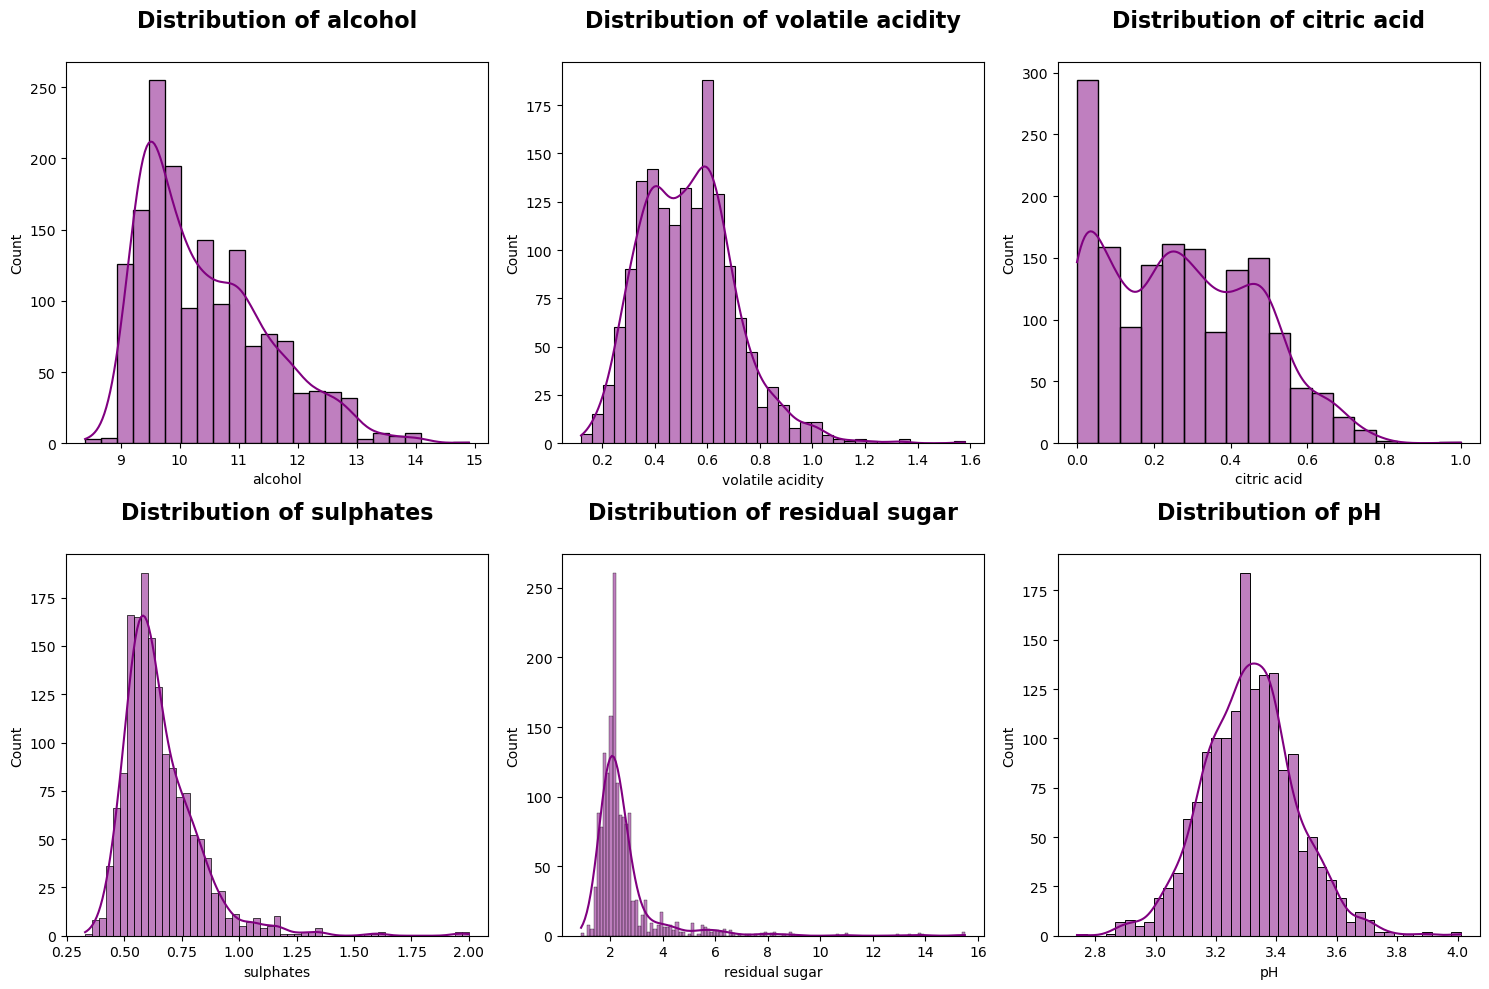

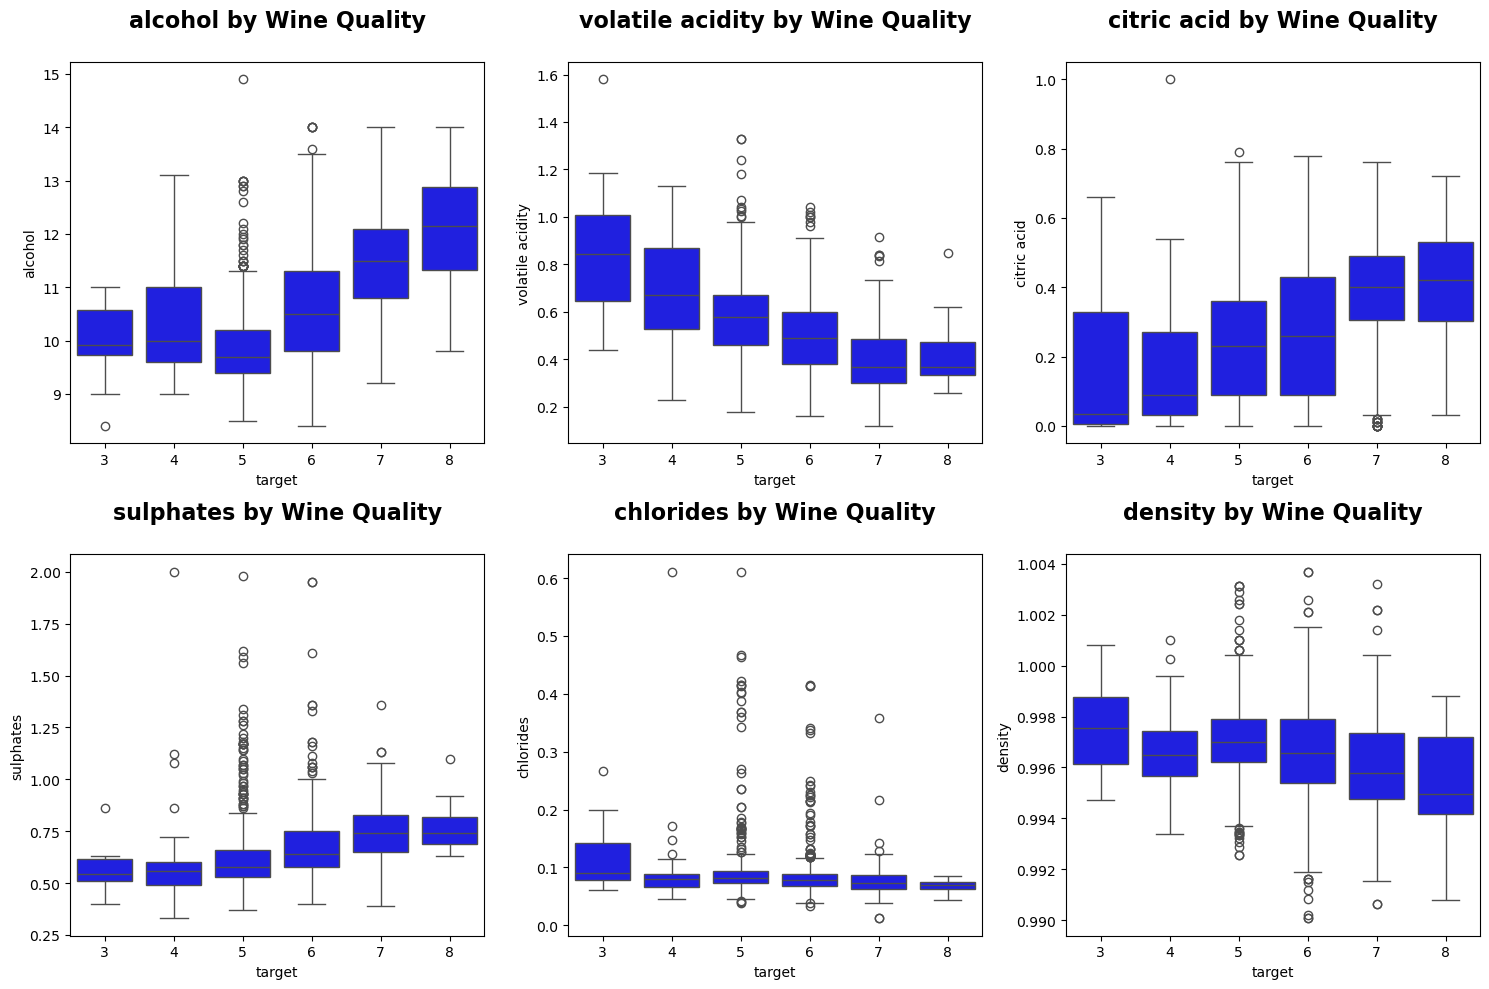

In [20]:
# Perform an exploratory data analysis of the red wine quality dataset:

# I will perform the following visualizations:

# 1. Wine quality distribution
# 2. Correlation matrix of the Wine features
# 3. Pairplot of few features (Alcohol, Volatile Acidity, Citric Acid, Sulphates) vs target
# 4. Distribution of some chemical (Alcohol, Volatile acidity, Citric acid, Sulphates, Residual sugar, pH)
# 5. Boxplots of features by quality (Alcohol, Volatile acidity, Citric acid, Sulphates, Chlorides, Density)

# 1. Wine quality distribution using a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=redwine, x='target', color='lightgreen', edgecolor='black')
plt.title('Wine quality distribution\n', fontsize=16, weight='bold')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.tight_layout()

# 2. Correlation matrix of the Wine features using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(redwine.corr(), annot=True, cmap='hot', center=0, 
            fmt='.2f', square=True)
plt.title('Correlation matrix of the Wine features\n', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# 3. Pairplot of few features vs target using seaborn pairplot
features_4 = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'target']
g = sns.pairplot(redwine[features_4], hue='target', palette='viridis')
g._legend.set_bbox_to_anchor((1.1, 0.5))
plt.suptitle('Pairplot of few features vs target\n', fontsize=16, weight='bold')
plt.tight_layout()

# 4. Distribution of some chemical using histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
chemicals = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'residual sugar', 'pH']
for i, chem in enumerate(chemicals):
    ax = axes[i//3, i%3]
    sns.histplot(data=redwine, x=chem, ax=ax, kde=True, color='purple')
    ax.set_title(f'Distribution of {chem}\n', fontsize=16, weight='bold')
    plt.tight_layout()    

# 5. Boxplots of features by quality using seaborn boxplot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features_6 = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'chlorides', 'density']

for i, feature in enumerate(features_6):
    ax = axes[i//3, i%3]
    sns.boxplot(data=redwine, x='target', y=feature, ax=ax, color='blue')
    ax.set_title(f'{feature} by Wine Quality\n', fontsize=16, weight='bold')
    plt.tight_layout()

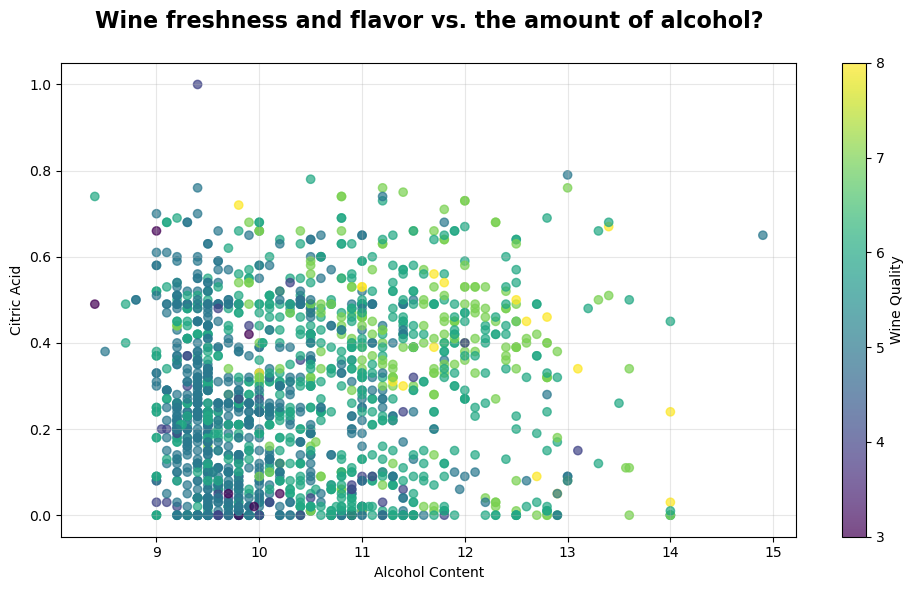

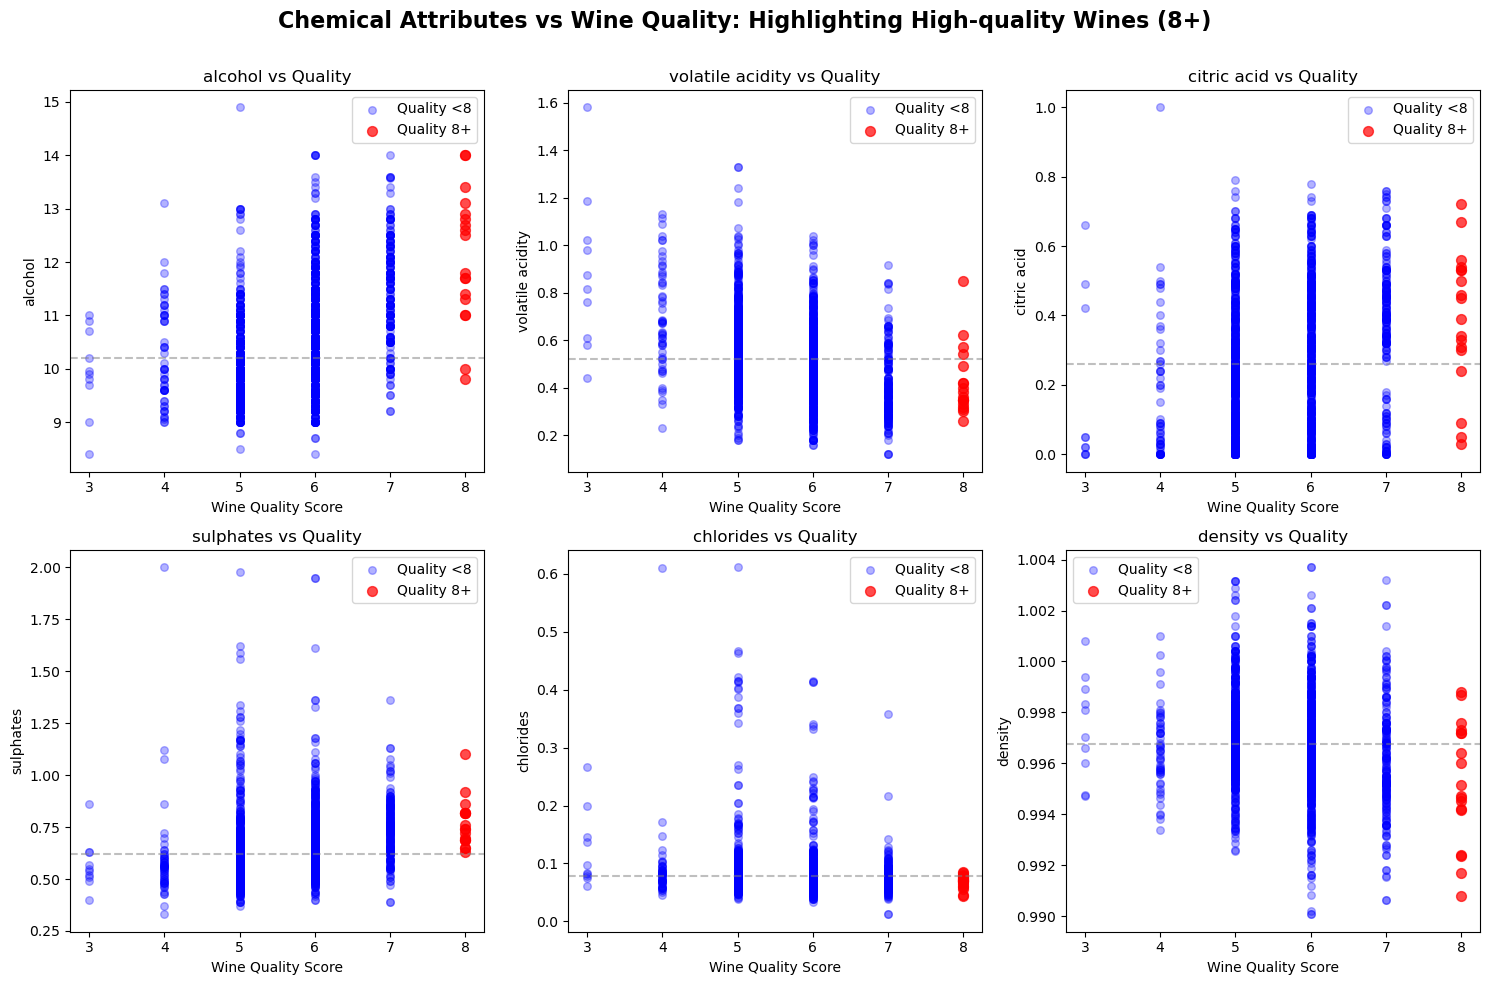

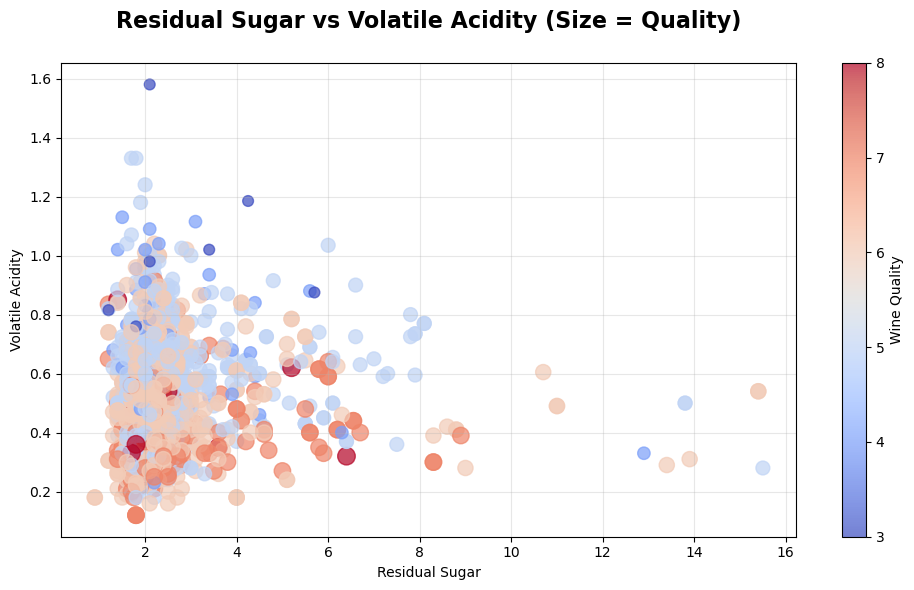

In [27]:
# Personally I interested in these 3 features:

# 1. Citric acid vs. alcohol 
#    (What's the relationship between wine's freshness + flavor and wine quality?)

# 2. Wine quality with a score of 8 
#    (What contribute to a high-score wine?)

# 3. Residual sugar vs volatile acidity 
#    (Does sweet wine have better smell?)

# PLOT #1. Citric acid vs Alcohol, colored by Wine Quality

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(redwine['alcohol'], redwine['citric acid'], 
            c=redwine['target'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Citric Acid')
plt.title('Wine freshness and flavor vs. the amount of alcohol?\n', 
          fontsize=16, weight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()


# PLOT #2. Features contributing to high-score wine (Quality = 8)

# Filter high-quality wines
high_quality = redwine[redwine['target'] >= 8]
normal_quality = redwine[redwine['target'] < 8]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'chlorides', 'density']

for i, feature in enumerate(features):
    ax = axes[i//3, i%3]
    
    # Create scatter plot with density
    ax.scatter(normal_quality['target'], normal_quality[feature], 
               alpha=0.3, color='blue', label='Quality <8', s=30)
    
    # Highlight high-quality wines
    ax.scatter(high_quality['target'], high_quality[feature], 
               alpha=0.7, color='red', label='Quality 8+', s=50)
    
    ax.set_xlabel('Wine Quality Score')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} vs Quality')
    ax.legend()
    
    # Add horizontal line at median for reference
    median_val = redwine[feature].median()
    ax.axhline(y=median_val, color='gray', linestyle='--', alpha=0.5, 
               label=f'Overall Median: {median_val:.2f}')

plt.suptitle('Chemical Attributes vs Wine Quality: Highlighting High-quality Wines (8+)\n', 
             fontsize=16, weight='bold')
plt.tight_layout()

# PLOT #3. Residual sugar vs Volatile Acidity colored by Wine Quality

# Create scatter plot
plt.figure(figsize=(10, 6))

# Create size mapping based on quality (small vs large dots)
sizes = redwine['target'] * 20

scatter = plt.scatter(redwine['residual sugar'], redwine['volatile acidity'], 
                      c=redwine['target'], cmap='coolwarm', 
                      s=sizes, alpha=0.7)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Volatile Acidity')
plt.title('Residual Sugar vs Volatile Acidity (Size = Quality)\n',
          fontsize=16, weight='bold')
plt.grid(True,alpha=0.3)
plt.tight_layout()


**#1 Noteworthy:** *"What's the relationship between wine's freshness and flavor vs wine quality?"* 

The plot shows that quality depends on having both elements together: enough alcohol for flavor body and enough citric acid for freshness. I notice that while most lower scoring wines cluster safely in the lower left quarter with moderate levels, the few yellow high quality dots appear in the upper right corner, suggesting that good wines intentionally push both limits simultaneously rather than optimizing one at the expense of the other.


**#2 Noteworthy:** *"What contributes to a high-score wine?"* 

The six subplots reveal that good wines (score 8+) achieve consistency across multiple dimensions: they maintain similar alcohol levels while minimizing chlorides and density, but still retain sufficient volatile acidity and sulphates. What stands out is how tightly these high-quality wines cluster within each chemical's optimal range, while lower quality wines scatter widely, indicating that good wines maintain balance across the entire chemical profile rather than maximizing single attributes.


**#3 Noteworthy:** *"Does sweet wine have better smell?"* 

The visualization contradicts my hope for a sweet wine that smells great. Larger red dots (higher quality) consistently cluster in the lower left region regardless of sugar content, showing that good wines maintain low volatile acidity (less vinegar smell). This suggests aroma quality operates independently of sweetness; controlling volatile acidity appears essential for quality across all wine styles.

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

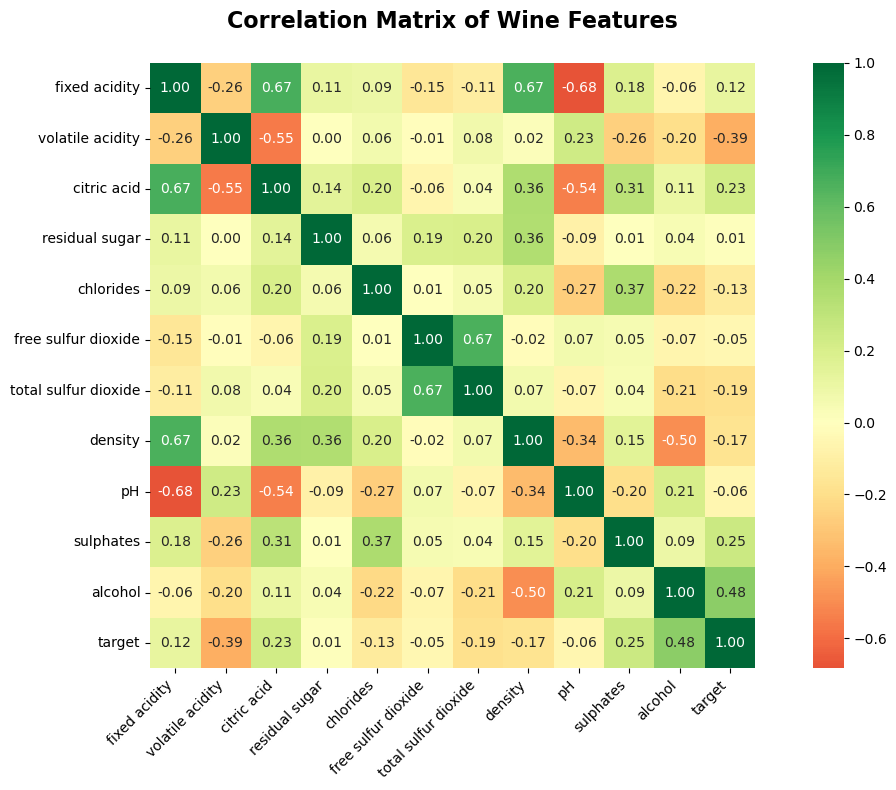

In [28]:
# The correlation matrix of the red wine quality dataset
plt.figure(figsize=(12, 8))
sns.heatmap(redwine.corr(), annot=True, cmap='RdYlGn', center=0,
            fmt='.2f', square=True)
plt.title('Correlation Matrix of Wine Features\n', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()


In [29]:
# Find the most correlated pair (Most green in the heatmap, excluding self-correlation)

# 1. Unstack the correlation matrix and sort values
correlated_pairs = redwine.corr().unstack().sort_values(ascending=False)

# 2. Filter out same-column correlations
#    Exclude self-correlations by removing pairs where the columns are the same
#    Get top 5 most correlated pairs of different columns
most_correlated = correlated_pairs[(correlated_pairs < 0.999) & (correlated_pairs != 1.0)].head(5)

# 3. Print the top 5 most correlated pairs of different columns
print("TOP 5 MOST CORRELATED PAIRS OF DIFFERENT COLUMNS:")
print("*" * 61, "\n")

# 4. Format and display the results for each pair
for idx, value in most_correlated.items():
    col1, col2 = idx
    print(f"{col1:_<25} & {col2:_<25}: {value:+.3f}")

TOP 5 MOST CORRELATED PAIRS OF DIFFERENT COLUMNS:
************************************************************* 

fixed acidity____________ & citric acid______________: +0.672
citric acid______________ & fixed acidity____________: +0.672
density__________________ & fixed acidity____________: +0.668
fixed acidity____________ & density__________________: +0.668
total sulfur dioxide_____ & free sulfur dioxide______: +0.668


### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

#### 1. Linear Regression
Scikit-learn Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

More information (Data Camp):
https://www.datacamp.com/tutorial/sklearn-linear-regression

Summary: A simple model that finds the best-fitting straight line through data points.

#### 2. Random Forest Regressor
Scikit-learn Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

More information (NVIDIA):
https://www.nvidia.com/en-us/glossary/random-forest/

Summary: An ensemble method that builds multiple decision trees on random data subsets and averages their predictions.

#### 3. Gradient Boosting Regressor
Scikit-learn Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

More information (Towards Datascience):
https://towardsdatascience.com/gradient-boosting-regressor-explained-a-visual-guide-with-code-examples-c098d1ae425c/

Summary: An ensemble technique that builds trees sequentially, where each new tree corrects errors made by previous ones.

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

PERFORMANCE COMPARISON OF THREE MODEL CLASSES

******************************************************************************
Model Class          L1 Loss (MAE)   L2 Loss (MSE)   Error Std       R^2 Score      
------------------------------------------------------------------------------
Linear Regression    0.5005          0.4168          0.6458          0.3606         
Random Forest        0.1481          0.0452          0.2125          0.9306         
Gradient Boosting    0.3967          0.2544          0.5045          0.6097         

BEST MODEL BY L1 Loss (MAE): Random Forest (0.1481)
BEST MODEL BY L2 Loss (MSE): Random Forest (0.0452)


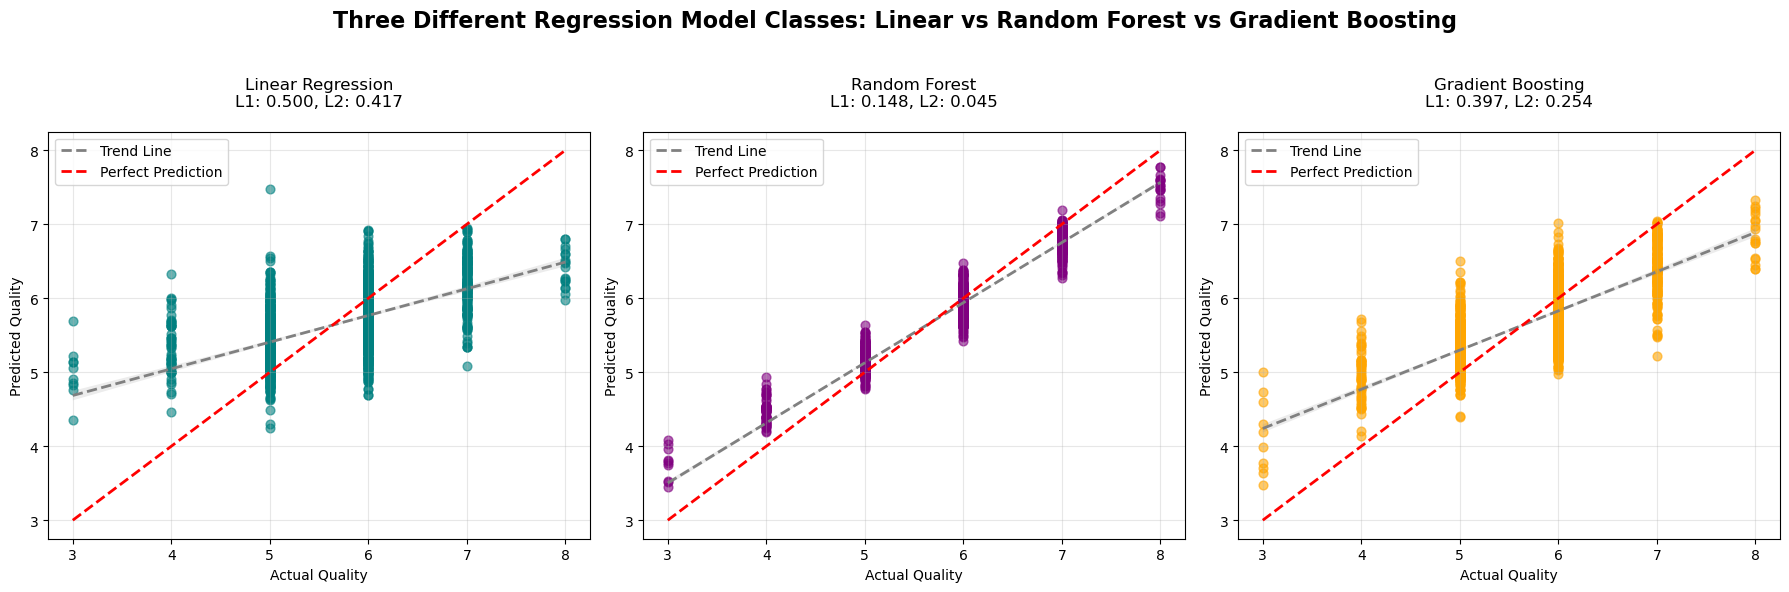

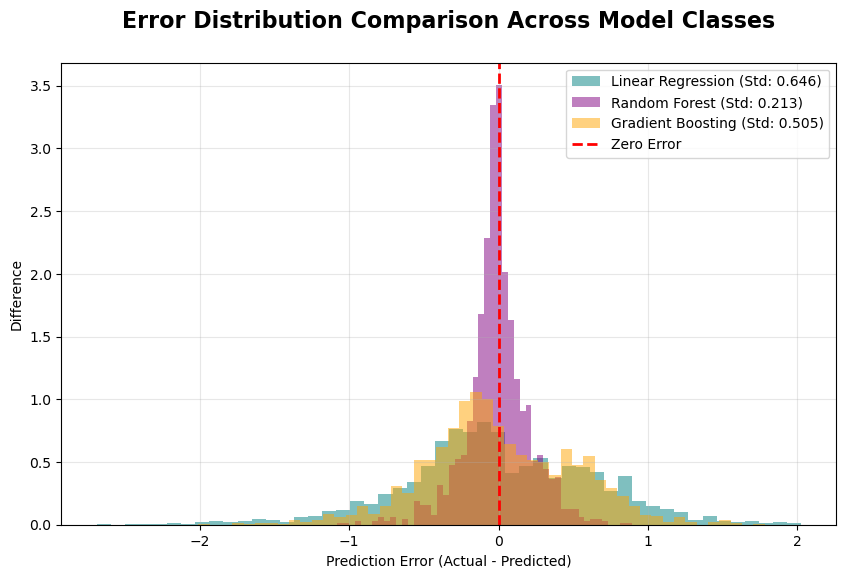

In [30]:
# Separate features (X) and target (y) variable 
X = redwine.drop('target', axis=1)
y = redwine['target']

# Build 3 different linear models
models = {
    'Linear Regression': sklearn.linear_model.LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Create one chart with multiple subplots to see the differences
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
predictions = {}
losses = {}

# Train each model and prepare data
all_data = pd.DataFrame({'Actual': y})

for idx, (name, model) in enumerate(models.items()):
    model.fit(X, y)
    y_pred = model.predict(X)
    predictions[name] = y_pred
    losses[name] = {
        'L1': mean_absolute_error(y, y_pred),
        'L2': mean_squared_error(y, y_pred)
    }
    
    # Add predictions to dataframe for Seaborn
    all_data[f'{name}_Predicted'] = y_pred

# Create seaborn plots
for idx, (name, model) in enumerate(models.items()):
    ax = axes[idx]
    
    # Using Seabornregplot for trend line
    sns.regplot(x='Actual', y=f'{name}_Predicted', data=all_data,
                scatter_kws={'alpha': 0.6, 's': 40, 'color': ['teal', 'purple', 'orange'][idx]},
                line_kws={'color': 'gray', 'linestyle': '--', 'linewidth': 2, 'label': 'Trend Line'},                
                ax=ax)
    
    # Add perfect prediction line
    ax.plot([all_data['Actual'].min(), all_data['Actual'].max()], 
            [all_data['Actual'].min(), all_data['Actual'].max()], 
            'r--', linewidth=2, label='Perfect Prediction')
    
    # Add labels and title with loss metrics
    ax.set_xlabel('Actual Quality')
    ax.set_ylabel('Predicted Quality')
    ax.set_title(f'{name}\nL1: {losses[name]["L1"]:.3f}, L2: {losses[name]["L2"]:.3f}\n')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left') 

# Main title for the figures
plt.suptitle('Three Different Regression Model Classes: Linear vs Random Forest vs Gradient Boosting\n', 
             fontsize=16, weight='bold')
plt.tight_layout()

# Add custom error distribution histogram for each model class
plt.figure(figsize=(10, 6))
colors = ['teal', 'purple', 'orange']
for idx, (name, y_pred) in enumerate(predictions.items()):
    diff = y - y_pred
    plt.hist(diff, bins=50, alpha=0.5, color=colors[idx], 
             label=f'{name} (Std: {diff.std():.3f})', density=True)

# Add labels and title
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Difference')
plt.title('Error Distribution Comparison Across Model Classes\n', fontsize=16, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Print detailed performance comparison
print("PERFORMANCE COMPARISON OF THREE MODEL CLASSES\n")
print("*" * 78)
print(f"{'Model Class':<20} {'L1 Loss (MAE)':<15} {'L2 Loss (MSE)':<15} {'Error Std':<15} {'R^2 Score':<15}")
print("-" * 78)

for name in models.keys():
    y_pred = predictions[name]
    diff = y - y_pred

    # Calculate coefficient R^2 score (R-squared = 1 - (sum of squared residuals / total sum of squares))
    r2_score = 1 - (np.sum(diff**2) / np.sum((y - y.mean())**2))
    
    print(f"{name:<20} {losses[name]['L1']:<15.4f} {losses[name]['L2']:<15.4f} "
          f"{diff.std():<15.4f} {r2_score:<15.4f}")

# Print the comparison for best L1 and L2 performing models
best_L1 = min(losses.items(), key=lambda x: x[1]['L1'])
best_L2 = min(losses.items(), key=lambda x: x[1]['L2'])

print(f"\nBEST MODEL BY L1 Loss (MAE): {best_L1[0]} ({best_L1[1]['L1']:.4f})")
print(f"BEST MODEL BY L2 Loss (MSE): {best_L2[0]} ({best_L2[1]['L2']:.4f})")

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

L2 LOSS COMPARISON: CROSS-VALIDATION vs FULL DATASET

Model                CV Mean L2   CV Std L2    Full Data L2    Difference  
-------------------------------------------------------------------------
Linear Regression    0.4288       0.0514       0.4168          -0.0120     
Random Forest        0.3327       0.0242       0.0452          -0.2875     
Gradient Boosting    0.3855       0.0333       0.2544          -0.1312     

BEST MODEL: Random Forest (Lowest CV MSE: 0.3327)


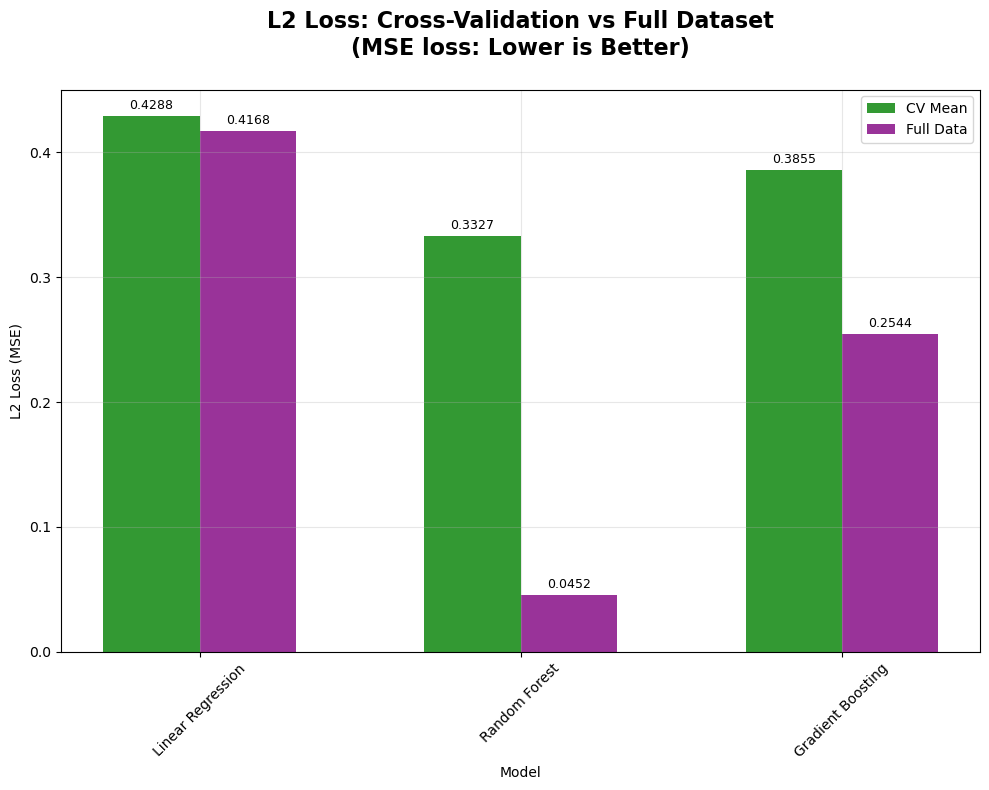

In [31]:
# Separate features (X) and target (y) variable 
X = redwine.drop('target', axis=1)
y = redwine['target']

# Build 3 different linear models
models = {
    'Linear Regression': sklearn.linear_model.LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize and store results
results_cv = {}

# Using 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():

    # L2 losses (MSE): Cross-validation 
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Then convert back to positive MSE for clarity
    cv_l2_losses = -cv_scores  # Convert back to positive MSE
    
    # Cross-validation: Training on whole dataset
    model.fit(X, y)
    y_pred_full = model.predict(X)
    full_data_l2 = mean_squared_error(y, y_pred_full)
    
    results_cv[name] = {
        'cv_l2_mean': cv_l2_losses.mean(),
        'cv_l2_std': cv_l2_losses.std(),
        'full_data_l2': full_data_l2,
        'cv_l2_losses': cv_l2_losses
    }

# Create comparison plot
fig, ax = plt.subplots(figsize=(10, 8))

# Bar chart comparing L2 losses
model_names = list(models.keys())
cv_means = [results_cv[name]['cv_l2_mean'] for name in model_names]
full_data = [results_cv[name]['full_data_l2'] for name in model_names]

# Set bar width
x_pos = np.arange(len(model_names))
width = 0.3

# Plot bars for CV mean and full data L2 losses
bars1 = ax.bar(x_pos - width/2, cv_means, width, 
                capsize=5, label='CV Mean', color='green', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, full_data, width, 
                capsize=5, label='Full Data', color='purple', alpha=0.8)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('L2 Loss (MSE)')
ax.set_title('L2 Loss: Cross-Validation vs Full Dataset\n(MSE loss: Lower is Better)\n', fontsize=16, weight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels on bars
ax.bar_label(bars1, fmt='%.4f', padding=3, fontsize=9)
ax.bar_label(bars2, fmt='%.4f', padding=3, fontsize=9)
plt.tight_layout()

# Print detailed results
print("L2 LOSS COMPARISON: CROSS-VALIDATION vs FULL DATASET")
print("=" * 73)
print(f"\n{'Model':<20} {'CV Mean L2':<12} {'CV Std L2':<12} {'Full Data L2':<15} {'Difference':<12}")
print("-" * 73)

for name in model_names:
    cv_mean = results_cv[name]['cv_l2_mean']
    full_l2 = results_cv[name]['full_data_l2']
    difference = full_l2 - cv_mean
    print(f"{name:<20} {cv_mean:<12.4f} {results_cv[name]['cv_l2_std']:<12.4f} "
          f"{full_l2:<15.4f} {difference:<12.4f}")
    
# Print the best performing model
best_model = min(results_cv.items(), key=lambda x: x[1]['cv_l2_mean'])[0]
print(f"\nBEST MODEL: {best_model} (Lowest CV MSE: {results_cv[best_model]['cv_l2_mean']:.4f})")

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

L2 LOSS COMPARISON: STANDARDIZED vs FULL DATASET

Model                Full Data L2    Standardized L2    Difference  
------------------------------------------------------------------
Linear Regression    0.4168          0.4168             -0.0000     
Random Forest        0.0452          0.0453             0.0001      
Gradient Boosting    0.2544          0.2544             -0.0000     

RESULT:

Comparing these models, not much of a difference observed between standardized and original models.


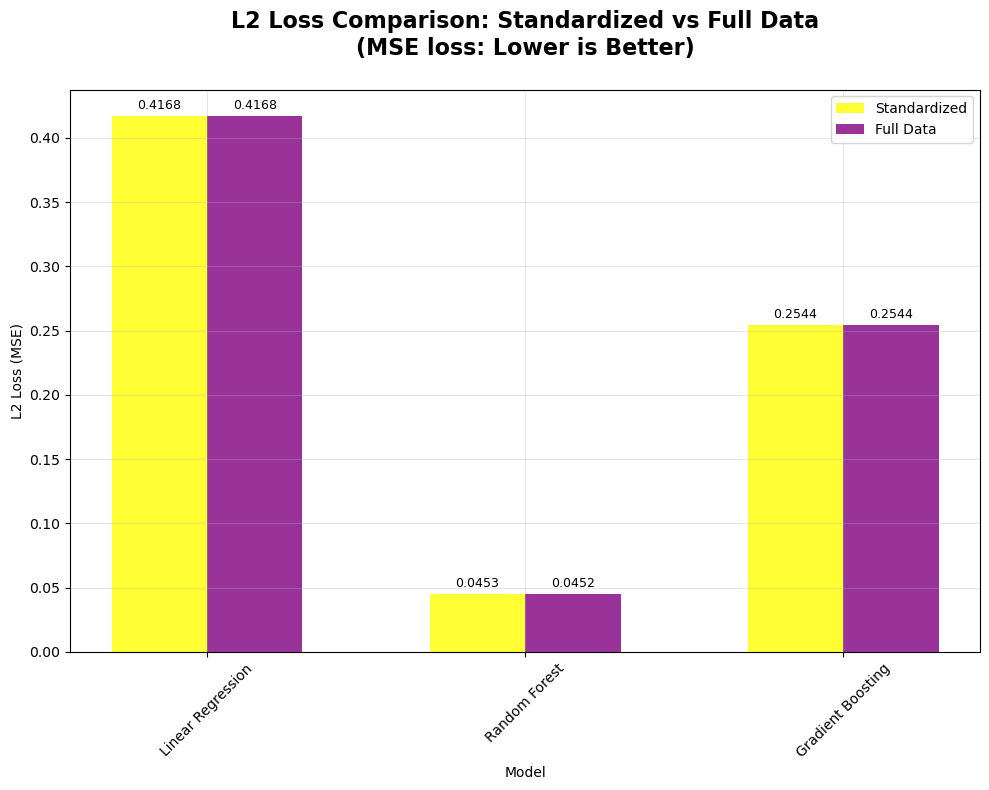

In [32]:
# Separate features (X) and target (y) variable
X = redwine.drop('target', axis=1)
y = redwine['target']

# Build 3 different models WITH PIPELINES including StandardScaler to preprocess data with mean=0, std=1
pipelines = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', sklearn.linear_model.LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(random_state=42))
    ])
}

# Initialize and store results
results_std = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    results_std[name] = {
        'L2': mean_squared_error(y, y_pred)
    }

# Hard code "Problem 6" results for comparison. Full data without standardization
problem6_results = {
    'Linear Regression': 0.4168,
    'Random Forest': 0.0452,
    'Gradient Boosting': 0.2544
}

# Create comparison bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Bar chart comparing L2 losses
model_names = list(pipelines.keys())
l2_std = [results_std[name]['L2'] for name in model_names]
l2_orig = [problem6_results[name] for name in model_names]

# Set bar width
x_pos = np.arange(len(model_names))
width = 0.3

# Plot bars for standardized and full data L2 losses
bars1 = ax.bar(x_pos - width/2, l2_std, width,
               label='Standardized', color='yellow', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, l2_orig, width,
               label='Full Data', color='purple', alpha=0.8)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('L2 Loss (MSE)')
ax.set_title('L2 Loss Comparison: Standardized vs Full Data\n(MSE loss: Lower is Better)\n', 
             fontsize=16, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels
ax.bar_label(bars1, fmt='%.4f', padding=3, fontsize=9)
ax.bar_label(bars2, fmt='%.4f', padding=3, fontsize=9)

plt.tight_layout()

# Print comparison table
print("L2 LOSS COMPARISON: STANDARDIZED vs FULL DATASET\n")
print("=" * 66)
print(f"{'Model':<20} {'Full Data L2':<15} {'Standardized L2':<18} {'Difference':<12}")
print("-" * 66)

# Compare the results
different_models = []

# Set a small threshold to determine significant difference
# This threshold can be adjusted based on the context and significance level required
# I choose a small threshold to highlight significant differences
threshold = 0.0001

for name in model_names:
    p6 = problem6_results[name]
    p8 = results_std[name]['L2']
    diff = p8 - p6
    
    print(f"{name:<20} {p6:<15.4f} {p8:<18.4f} {diff:<12.4f}")

print('\nRESULT:')
different_models = [name for name in results_std 
                   if abs(results_std[name]['L2'] - problem6_results[name]) > threshold]

if different_models:
    for name in different_models:
        diff = results_std[name]['L2'] - problem6_results[name]
        print(f"This model: {name} (Difference: {diff:+.6f}) performs differently between standardized and original models.")
        
else:
    print("\nComparing these models, not much of a difference observed between standardized and original models.")

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

#### My Answer: 
This approach is aligned with ensemble learning, and there's an established algorithm called Random Forest that builds on this idea.

*Reference: (Problem 5)*

Scikit-learn Documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

More information (NVIDIA):
https://www.nvidia.com/en-us/glossary/random-forest/

Summary: An ensemble method that builds multiple decision trees on random data subsets and averages their predictions.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 


FINAL COMPARISON: ALL MODELS ACROSS ALL PROBLEMS

MODEL CLASS             FULL L2 Loss    CV L2 Loss      STD L2 Loss    
-------------------------------------------------------------------
Linear Regression       0.4168          0.4288          0.4168         
Random Forest           0.0452          0.3327          0.0453         
Gradient Boosting       0.2544          0.3855          0.2544         


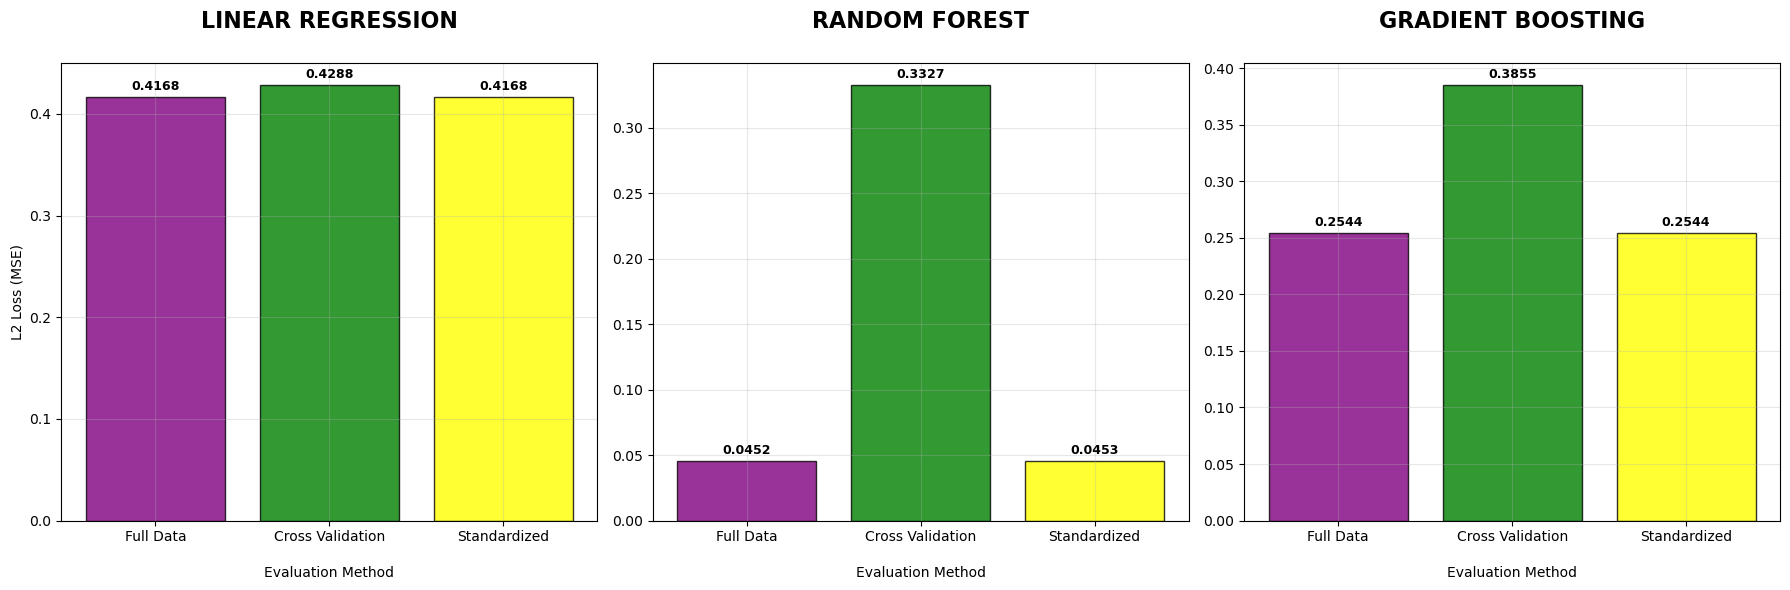

In [33]:
# From the analysis of Problems 6, 7, and 8, I pick Random Forest as the best model class
# This is based on its consistently low L2 loss across all evaluation methods
# For desmonstration, I will create bar chart to compare all three evaluation methods for all models

# Create a bar chart to visually compare all three models's L2 losses
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Color and label choices
colors = ['purple', 'green', 'yellow']
labels = ['Full Data', 'Cross Validation', 'Standardized']

# List of data from Problem 6, 7, and 8. Need to run those cells first
full_l2 = [results_cv[name]['full_data_l2'] for name in models.keys()]
cv_l2 = [results_cv[name]['cv_l2_mean'] for name in models.keys()]
std_l2 = [results_std[name]['L2'] for name in models.keys()]

# Plot each model
model_names = ['LINEAR REGRESSION', 'RANDOM FOREST', 'GRADIENT BOOSTING']
for idx, (ax, title) in enumerate(zip([ax1, ax2, ax3], model_names)):
    values = [full_l2[idx], cv_l2[idx], std_l2[idx]]    
    bars = ax.bar(labels, values, color=colors, alpha=0.8, edgecolor='black')
    ax.set_xlabel('\nEvaluation Method')
    if idx == 0:  # Only set ylabel on first plot
        ax.set_ylabel('L2 Loss (MSE)')   
    ax.set_title(title + '\n', fontsize=16, fontweight='bold')
    ax.set_ylim(0)
    ax.grid(True, alpha=0.3)    
    
    # Add value on top of bars
    ax.bar_label(bars, fmt='%.4f', padding=3, fontsize=9, fontweight='bold')

plt.tight_layout()

# Final comparison table. Same data for clarity
print("\n" + "="*67)
print("FINAL COMPARISON: ALL MODELS ACROSS ALL PROBLEMS")
print("="*67)

print(f"\n{'MODEL CLASS':<23} {'FULL L2 Loss':<15} {'CV L2 Loss':<15} {'STD L2 Loss':<15}")
print("-" * 67)

for idx, name in enumerate(models.keys()):
    print(f"{name:<23} {full_l2[idx]:<15.4f} {cv_l2[idx]:<15.4f} {std_l2[idx]:<15.4f}")

Based on the evaluation across all three problems, I selected **Random Forest** as the best model for wine quality prediction. 

The main criteria was the L2 loss (MSE) across three evaluation methods: training on full dataset (Problem 6), 5-fold cross-validation (Problem 7), and standardized data (Problem 8). Random Forest demonstrated higher performance in every test with MSE values of 0.0452, 0.3327, and 0.0453 respectively. On both full dataset and standardized methods, the loss is much lower than Linear Regression (0.4168) and Gradient Boosting (0.2544). The 5-fold cross-validation results clearly show which models overfit: when a model's full data training loss is much lower than its cross-validation loss, it indicates overfitting to the training data.